<a href="https://colab.research.google.com/github/flaviogbm/financial-data-analysis_and_machine-leaning/blob/main/Taxa_de_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação e atualização das bibliotecas

In [2]:
!pip install pandas --upgrade
!pip install numpy --upgrade
!pip install plotly --upgrade

# Importação das bibliotecas e da base de dados

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
dataset = pd.read_csv('acoes.csv')
dataset.shape

(818, 7)

In [5]:
dataset

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
1,2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2,2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
3,2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
4,2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...,...
813,2022-04-13,17.000000,14.530000,32.560001,6.030000,36.480000,112.519997
814,2022-04-14,16.400000,14.360000,32.290001,6.010000,35.000000,111.650002
815,2022-04-18,15.890000,14.330000,31.910000,5.890000,34.119999,111.459999
816,2022-04-19,16.410000,14.490000,31.370001,5.940000,36.009998,110.919998


# Taxa de retorno

Normalização das ações

In [6]:
df_normalizado = dataset.copy()
df_normalizado

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
1,2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2,2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
3,2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
4,2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...,...
813,2022-04-13,17.000000,14.530000,32.560001,6.030000,36.480000,112.519997
814,2022-04-14,16.400000,14.360000,32.290001,6.010000,35.000000,111.650002
815,2022-04-18,15.890000,14.330000,31.910000,5.890000,34.119999,111.459999
816,2022-04-19,16.410000,14.490000,31.370001,5.940000,36.009998,110.919998


In [7]:
for i in df_normalizado.columns[1:]:
  df_normalizado[i] = (df_normalizado[i] / df_normalizado[i][0])

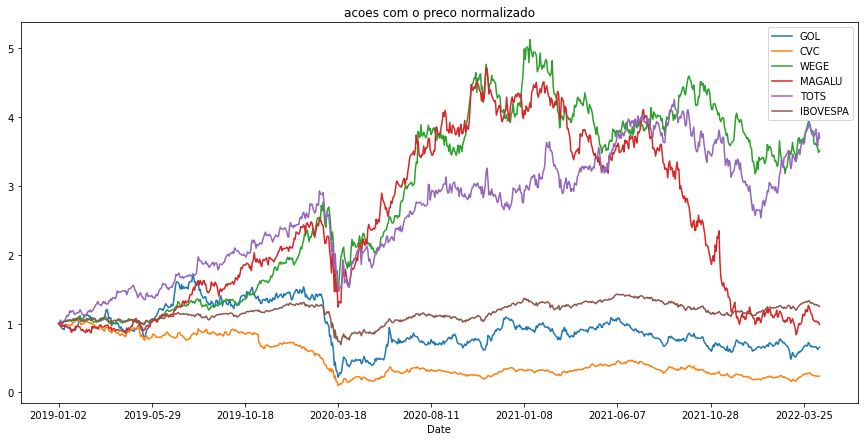

In [8]:
df_normalizado.plot(x = "Date", figsize = (15,7), title = "acoes com o preco normalizado");

Retirando a coluna 'Date' da base de dados

In [9]:
df_normalizado.drop(labels = ['Date'], axis = 1, inplace = True)

# Taxa de retorno simples diaria

In [10]:
retorno_diario = (df_normalizado / df_normalizado.shift(1)) - 1
retorno_diario

,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.007073,-0.006383,0.022803,-0.010699,0.023037,0.001138
2,-0.024581,-0.012519,0.011419,-0.030435,0.027636,0.005682
3,-0.044000,0.012510,-0.015591,0.015527,-0.021580,-0.000226
4,-0.012971,-0.032784,-0.008192,-0.008059,-0.040719,0.003956
...,...,...,...,...,...,...
813,0.015532,-0.028094,0.005870,0.010050,0.018994,0.006710
814,-0.035294,-0.011700,-0.008292,-0.003317,-0.040570,-0.007732
815,-0.031098,-0.002089,-0.011768,-0.019967,-0.025143,-0.001702
816,0.032725,0.011165,-0.016923,0.008489,0.055393,-0.004845


# Taxa de retorno anual

In [11]:
retorno_anual = retorno_diario.mean() * 246
retorno_anual

GOL         0.160325
CVC        -0.152208
WEGE        0.462936
MAGALU      0.166308
TOTS        0.490631
IBOVESPA    0.109536
dtype: float64

In [12]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL         16.032517
CVC        -15.220820
WEGE        46.293562
MAGALU      16.630823
TOTS        49.063104
IBOVESPA    10.953609
dtype: float64

criação do variavel que contem os pesos de cada acao da carteira

In [13]:
pesos_acoes = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

Taxa de retorno media anual da carteira

In [14]:
np.dot(retorno_anual, pesos_acoes)

22.559837101196692

# Carteira e comparação com o indice IBOVESPA

In [15]:
carteira_normalizado = dataset.copy()
carteira_normalizado

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
1,2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2,2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
3,2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
4,2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...,...
813,2022-04-13,17.000000,14.530000,32.560001,6.030000,36.480000,112.519997
814,2022-04-14,16.400000,14.360000,32.290001,6.010000,35.000000,111.650002
815,2022-04-18,15.890000,14.330000,31.910000,5.890000,34.119999,111.459999
816,2022-04-19,16.410000,14.490000,31.370001,5.940000,36.009998,110.919998


In [16]:
for i in carteira_normalizado.columns[1:]:
  carteira_normalizado[i] = (carteira_normalizado[i] / carteira_normalizado[i][0])

carteira_normalizado['CARTEIRA'] = (carteira_normalizado['GOL'] + carteira_normalizado['CVC'] + carteira_normalizado['WEGE'] + carteira_normalizado['MAGALU'] + carteira_normalizado['TOTS'] / 5)
carteira_normalizado

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA,CARTEIRA
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.200000
1,2019-01-03,1.007073,0.993617,1.022803,0.989301,1.023037,1.001138,4.217401
2,2019-01-04,0.982318,0.981178,1.034483,0.959191,1.051309,1.006826,4.167433
3,2019-01-07,0.939096,0.993453,1.018354,0.974085,1.028621,1.006598,4.130712
4,2019-01-08,0.926915,0.960884,1.010011,0.966235,0.986736,1.010580,4.061392
...,...,...,...,...,...,...,...,...
813,2022-04-13,0.667976,0.237807,3.621802,1.037475,3.827153,1.280091,6.330491
814,2022-04-14,0.644401,0.235025,3.591769,1.034034,3.671885,1.270193,6.239605
815,2022-04-18,0.624361,0.234534,3.549500,1.013388,3.579563,1.268032,6.137695
816,2022-04-19,0.644794,0.237152,3.489433,1.021990,3.777845,1.261888,6.148938


In [17]:
fig = px.line(title = 'preço das acoes')
for i in carteira_normalizado.columns[1:]:
  fig.add_scatter(x = carteira_normalizado['Date'], y = carteira_normalizado[i], name = i)
fig.show()

In [18]:
carteira_normalizado.drop(['GOL', 'CVC', 'WEGE', 'MAGALU', 'TOTS'], axis = 1, inplace = True)
carteira_normalizado

,Date,IBOVESPA,CARTEIRA
0,2019-01-02,1.000000,4.200000
1,2019-01-03,1.001138,4.217401
2,2019-01-04,1.006826,4.167433
3,2019-01-07,1.006598,4.130712
4,2019-01-08,1.010580,4.061392
...,...,...,...
813,2022-04-13,1.280091,6.330491
814,2022-04-14,1.270193,6.239605
815,2022-04-18,1.268032,6.137695
816,2022-04-19,1.261888,6.148938


# Grafico responsivo da comparacao da carteira com o indice IBOVESPA

In [20]:
fig = px.line(title = 'Carteira X IBOVESPA')
for i in carteira_normalizado.columns[1:]:
  fig.add_scatter(x = carteira_normalizado['Date'], y = carteira_normalizado[i], name = i)
fig.show()